# Homework 5 - Representation Learning and Word Embeddings

In this assignment, you will explore word embeddings using Word2Vec and other techniques. You will also visualize the learned embeddings and perform various tasks to understand the properties and applications of word embeddings.

You will:
1. Load pre-trained word embeddings using gensim.
2. Compute cosine similarity between word vectors.
3. Solve word analogy problems using word embeddings.
4. Visualize word embeddings using PCA.
5. Analyze the effect of singular/plural forms and comparative/superlative forms of words in the embedding space.


## Task 1: Load Pre-trained Word Embeddings (1 pt)

You will load pre-trained word embeddings using the gensim library. You will also get the embedding for a specific word and check its dimensionality.

In [27]:
%pip install --upgrade gensim
import gensim.downloader as api

# Load pre-trained word vectors
word_vectors = api.load('glove-wiki-gigaword-100')
embedding_computer = word_vectors['computer']

print(f"Embedding for 'computer': {embedding_computer}")
print(f"Dimension of the embedding: {embedding_computer.shape[0]}")

Note: you may need to restart the kernel to use updated packages.
Embedding for 'computer': [-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.1972e-01
 -9.9605e-04 -2.6842e-01 -8.3038

## Task 2: Compute Cosine Similarity (1 pt)

In this task, you will implement a function to compute the cosine similarity between two vectors from scratch (i.e., without using built-in functions except `math.sqrt()`). You will then use this function to compute the similarity between several pairs of words. Understanding cosine similarity is crucial for working with word embeddings and other vector representations.

In [25]:
import numpy as np
import math

def cosine_similarity(vec1, vec2):
    # TODO: Implement function to compute cosine similarity between two embeddings vec1 and vec2
    return np.dot(vec1, vec2) / (math.sqrt(np.dot(vec1, vec1)) * math.sqrt(np.dot(vec2, vec2)))

    
# Compute similarity between pairs of words
words = [('computer', 'science'), ('boy', 'girl'), ('king', 'queen'), ('man', 'woman'), ('apple', 'orange'), ('cat', 'dog')]
for word1, word2 in words:
    vec1 = word_vectors[word1]
    vec2 = word_vectors[word2]
    similarity = cosine_similarity(vec1, vec2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity}")

Cosine similarity between 'computer' and 'science': 0.5621562325134654
Cosine similarity between 'boy' and 'girl': 0.9175729917384838
Cosine similarity between 'king' and 'queen': 0.7507690712652649
Cosine similarity between 'man' and 'woman': 0.832349430860717
Cosine similarity between 'apple' and 'orange': 0.5007040128931091
Cosine similarity between 'cat' and 'dog': 0.8798075483526085


## Task 3: Solve Word Analogies (1 pt)

In this task, you will use the word embeddings to solve word analogy problems. For example, you can solve the analogy `queen: woman :: ?:man` by finding the word that is most similar to the result of the operation `queen - woman + man`.

Use gensim's built-in function `most_similar` to find the word most similar to the result of vector arithmetic operations

This task illustrated the power of word embeddings in capturing semantic relationships.

In [26]:
# Solve word analogies
analogies = [
    ('queen', 'woman', 'man'),
    ('dad', 'man', 'woman'),
    ('paris', 'france', 'italy'),
    ('sun', 'day', 'night'),
    ('tree', 'forest', 'river'),
    ('happy', 'joy', 'sad')
]
for word1, word2, word3 in analogies:
    #TODO: Solve the analogies above by finding the word most similar (your_answer) to the result of vector arithmetic operations described.
    vec1 = word_vectors[word1]
    vec2 = word_vectors[word2]
    vec3 = word_vectors[word3]
    result_vector = np.add(np.subtract(vec1, vec2), vec3)
    most_similar_word = None
    highest_similarity = -1

    for word in word_vectors.index_to_key:
        similarity = cosine_similarity(result_vector, word_vectors[word])
        if similarity > highest_similarity:
            highest_similarity = similarity
            most_similar_word = word

    your_answer = most_similar_word
    print(f"{word1} - {word2} + {word3} = {your_answer} ")

queen - woman + man = queen 
dad - man + woman = mom 
paris - france + italy = rome 
sun - day + night = sun 
tree - forest + river = river 
happy - joy + sad = sad 


## Task 4: Visualize Word Embeddings

Next, we will visualize word embeddings using PCA (Principal Component Analysis). We will select a set of words, get their embeddings, and plot them in a 2D space. This visualization can help us in understanding the structure and relationships in the embedding space.

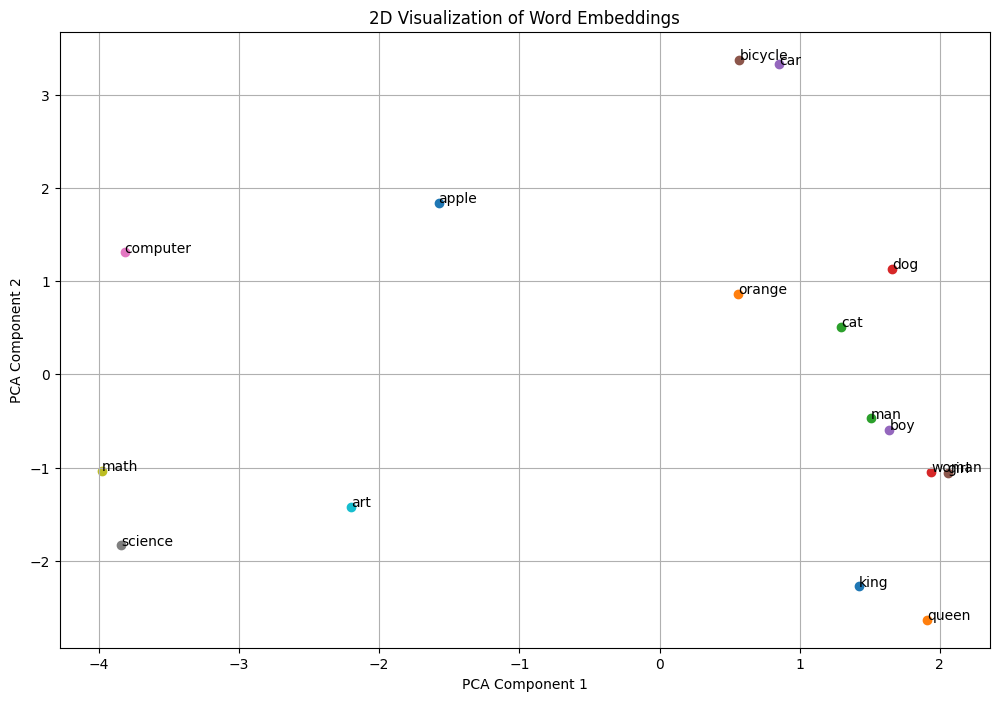

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# List of words to visualize
words_to_visualize = ['king', 'queen', 'man', 'woman', 'boy', 'girl', 'computer', 'science', 'math', 'art', 'apple', 'orange', 'cat', 'dog', 'car', 'bicycle']
embeddings = [word_vectors[word] for word in words_to_visualize]

# Reduce dimensionality
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(words_to_visualize):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Word Embeddings')
plt.grid(True)
plt.show()

## Task 5: Analyze Singular and Plural Forms

Next, we will analyze the singular and plural forms of several nouns and their relations in the embedding space. We will select a set of words, get their embeddings, and visualize them. This can help understand how embeddings represent morphological variations.

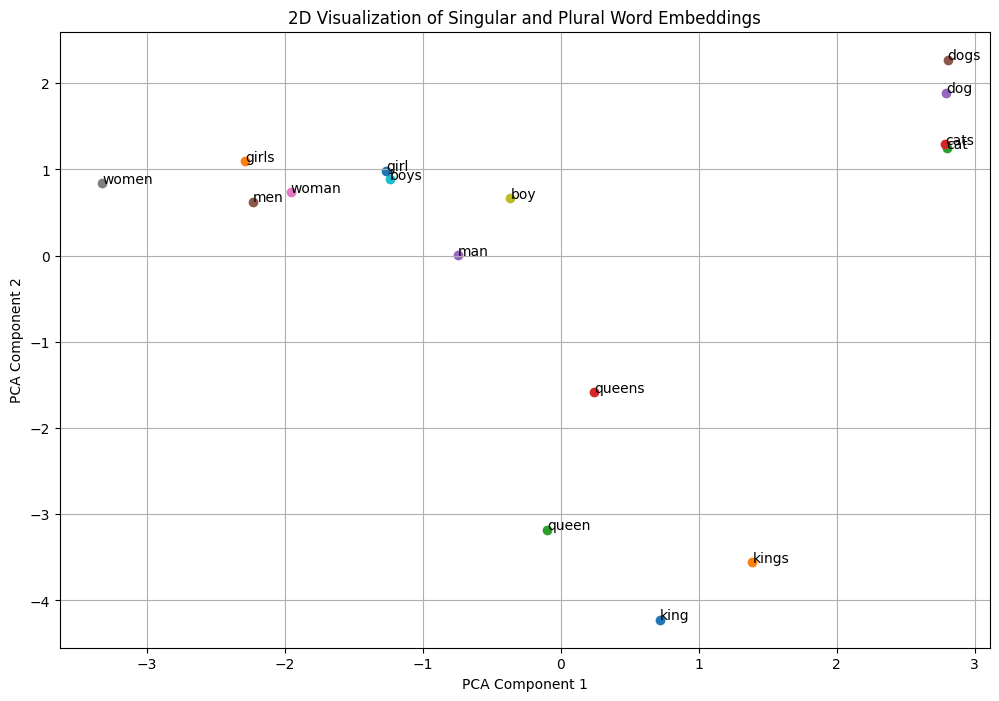

In [8]:
# List of singular and plural words
singular_plural_words = ['king', 'kings', 'queen', 'queens', 'man', 'men', 'woman', 'women', 'boy', 'boys', 'girl', 'girls', 'cat', 'cats', 'dog', 'dogs']
embeddings_singular_plural = [word_vectors[word] for word in singular_plural_words]

# Reduce dimensionality
embeddings_singular_plural_2d = pca.fit_transform(embeddings_singular_plural)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(singular_plural_words):
    plt.scatter(embeddings_singular_plural_2d[i, 0], embeddings_singular_plural_2d[i, 1])
    plt.annotate(word, (embeddings_singular_plural_2d[i, 0], embeddings_singular_plural_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Singular and Plural Word Embeddings')
plt.grid(True)
plt.show()

## Task 6: Analyze Adjectives and Their Forms

Next, we will analyze the comparative and superlative forms of several adjectives and their relations in the embedding space. We will select a set of words, get their embeddings, and visualize them.

This can help us in understanding how word embeddings capture comparative and superlative relations.

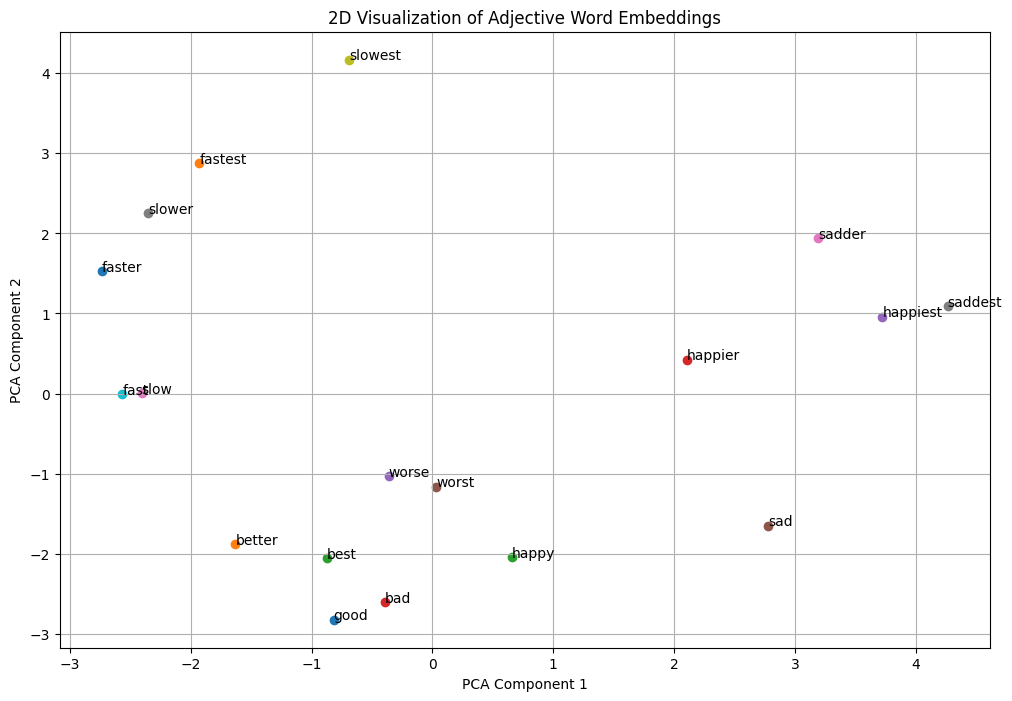

In [9]:
# List of adjectives and their comparative and superlative forms
adjectives = ['good', 'better', 'best', 'bad', 'worse', 'worst', 'slow', 'slower', 'slowest', 'fast', 'faster', 'fastest', 'happy', 'happier', 'happiest', 'sad', 'sadder', 'saddest']
embeddings_adjectives = [word_vectors[word] for word in adjectives]

# Reduce dimensionality
embeddings_adjectives_2d = pca.fit_transform(embeddings_adjectives)

# Plot embeddings
plt.figure(figsize=(12, 8))
for i, word in enumerate(adjectives):
    plt.scatter(embeddings_adjectives_2d[i, 0], embeddings_adjectives_2d[i, 1])
    plt.annotate(word, (embeddings_adjectives_2d[i, 0], embeddings_adjectives_2d[i, 1]))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Adjective Word Embeddings')
plt.grid(True)
plt.show()


## Summary (1 pt)

Briefly summarize your qualitative findings from Tasks 4, 5 and 6.
From Task 4, the PCA visualization of word embeddings shows that semantically similar words tend to cluster together. For example, 'king' and 'queen' are close to each other, as are 'man' and 'woman'. Also the shape of the vector that would take you from man to king is similar to the shape of the vector that would take you from woman to queen. Though thats not what happened when the word embeddings were calculated in task 3. 

In Task 5, the clearest trends emerged from the relationship between single and plural. The path from woman to women is similar to the path from boys to boy. The biggest difference is in the magnitude of the vector rather than the direction. I think its safe to assume that dog and dogs would have been similar if the graph was bigger. 

Task 6 shows that comparative and superlative forms of adjectives are positioned near their base forms. For instance, 'good', 'better', and 'best' are closely located, however the relationships arent as obvious within the principle components. For example, the replationship between 'sadder' and 'saddest' are not similar to 'happier' and 'happiest'. This may be due to the principle components not adequately representing the relationships in a way thats obvious to the human eye. 
